In [3]:
import pandas as pd

df = pd.read_csv("final_cleaned_data.csv")

# converting float to int
df = df.apply(lambda x: x.astype("Int64") if x.dtype == float and (x.dropna() % 1 == 0).all() else x)

# converting objects to strings
df['property_ID'] = df['property_ID'].astype('string')
df['locality_name'] = df['locality_name'].astype('string')
df['type'] = df['type'].astype('string')
df['subtype'] = df['subtype'].astype('string')
df['state_of_building'] = df['state_of_building'].astype('string')

# removing properties that do not have the price
df = df.dropna(subset=["price (€)"])

df.to_csv("cleaned_data_int.csv", index=False)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15366 entries, 0 to 15999
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   property_ID                    15366 non-null  string
 1   locality_name                  11605 non-null  string
 2   postal_code                    14084 non-null  Int64 
 3   type                           15366 non-null  string
 4   subtype                        15366 non-null  string
 5   price (€)                      15366 non-null  Int64 
 6   number_of_bedrooms             15094 non-null  Int64 
 7   living_area (m²)               14601 non-null  Int64 
 8   equiped_kitchen (yes:1, no:0)  15366 non-null  int64 
 9   furnished (yes:1, no:0)        15366 non-null  int64 
 10  open_fire (yes:1, no:0)        15366 non-null  int64 
 11  terrace (yes:1, no:0)          15366 non-null  int64 
 12  terrace_area (m²)              7901 non-null   Int64 
 13  garden

In [ ]:
##CONCLUSIONS OUTLYING DATA Decide — keep, cap, transform, or drop? what about the projects???
""""
QUANTITATIVE

5   price (€): OKish but some houses are not realistic (1€ houses) -> DROP < 25K? (16 properties) OK
6   number_of_bedrooms: OK 272 Nones but that is fine -> some have 0 zero bedrooms (70) also fine (i checked some) OK
7   living_area (m²): Okish 24 houses having living area < 10m², one is way too big -> DROP! OK
12  terrace_area (m²): not OK we have 7,5K Nones but 12300 properties should have one? TRANSFORM/SPLIT/KEEP? we cannot drop here...
    we can also normalize the ones we have and get a mean average and input those here..options abount :)
    also 39 properties had terraces over 150m², not realistic , some even had 5Km² -> DROP? OK
14  number_facades: not OK 4,5K had None Values, categories that have values are OK (7 have 1 facade , a bit weird but possible) OK

QUALITATIVE (multiple categories)

0   property_ID : OK (it is immovlan's way of defining unique property)
1   locality_name: None -> almost 4K None entries, keep them apart or focus on region rather than streets?
2   postal_code: None -> almost 1,3K None entries, keep them apart or focus on region rather than streets?
    the problem with postal code and locality name it is often (i think almost always) a project (not always prop in a project)             
4   subtype: OKish but some subtypes that are questionable -> DROP! OK, keep until triplex, except for mansion
16  state_of_building: not OK 3,2K are None , and 10 are to demolish it is "ground"

QUALITATIVE (binary yes/no = 1/0)
3   type: OKish but 100 or so non house or apartments (garage, student, ...) -> DROP! OK (after drop it wil be binary house or appartment only)
8   equiped_kitchen (yes:1, no:0): OK no drops neccesary (4,5K have one) OK
9   furnished (yes:1, no:0): OK no drops neccessary (300 have one) OK
10  open_fire (yes:1, no:0): OK no drops neccessary (230 have one) OK
11  terrace (yes:1, no:0): OK but a bit weird...12300 have one? OK
13  garden (yes:1, no:0): Ok, almost 50/50 here OK
15  swimming_pool (yes:1, no:0): OK, only 400- pools but ok for Belgium OK
"""

In [ ]:
# Check for missing values (FARANGES)
missing_data = df.isnull().sum()
display(missing_data)

# Put the missing values per column in percentage
missing_summary = pd.DataFrame({
    'Missing Values': df.isnull().sum(),
    'Percentage (%)': (df.isnull().sum() / len(df)) * 100
})

# Round to 2 decimals
missing_summary['Percentage (%)'] = missing_summary['Percentage (%)'].round(2)
display(missing_summary)


property_ID                         0
locality_name                    3761
postal_code                      1282
type                                0
subtype                             0
price (€)                           0
number_of_bedrooms                272
living_area (m²)                  765
equiped_kitchen (yes:1, no:0)       0
furnished (yes:1, no:0)             0
open_fire (yes:1, no:0)             0
terrace (yes:1, no:0)               0
terrace_area (m²)                7465
garden (yes:1, no:0)                0
number_facades                   4513
swimming_pool (yes:1, no:0)         0
state_of_building                3225
dtype: int64

,Missing Values,Percentage (%)
property_ID,0,0.00
locality_name,3761,24.48
postal_code,1282,8.34
type,0,0.00
subtype,0,0.00
price (€),0,0.00
number_of_bedrooms,272,1.77
living_area (m²),765,4.98
"equiped_kitchen (yes:1, no:0)",0,0.00
"furnished (yes:1, no:0)",0,0.00


In [52]:
#how many different values and how much are there?
df["type"].value_counts()

type
Apartment     8005
House         7280
Business        37
Land            28
Investment      10
Garage           4
Student          2
Name: count, dtype: Int64

In [53]:
#how many different values and how much are there?
df["subtype"].value_counts()

subtype
Apartment              6808
Residence              6163
Villa                   556
Ground floor            368
Penthouse               322
Mixed building          273
Duplex                  253
Studio                  190
Chalet                   81
Master house             71
Bungalow                 67
Cottage                  61
Loft                     39
Triplex                  25
Commercial building      21
Development site         15
Office space             15
Land                     13
Investment property      10
Mansion                   8
Parking                   2
Garage                    2
Student flat              2
Business surface          1
Name: count, dtype: Int64

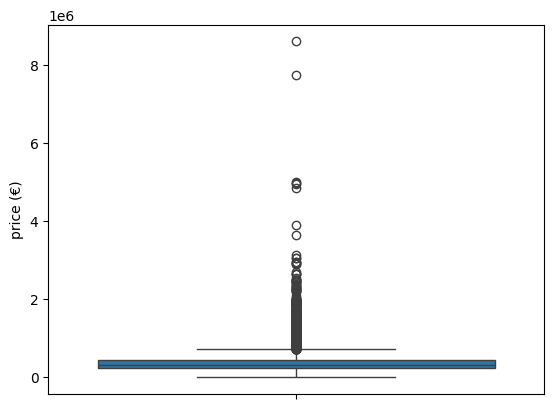

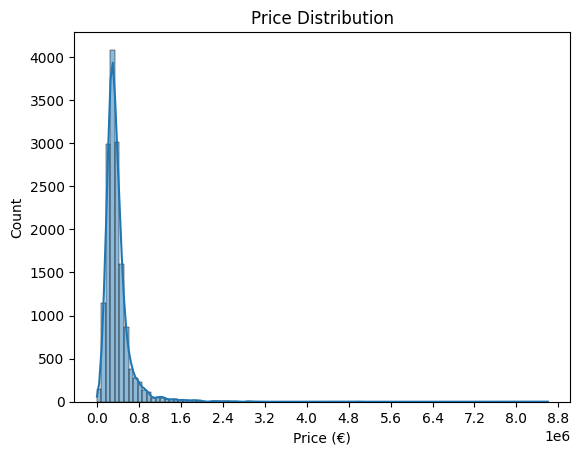

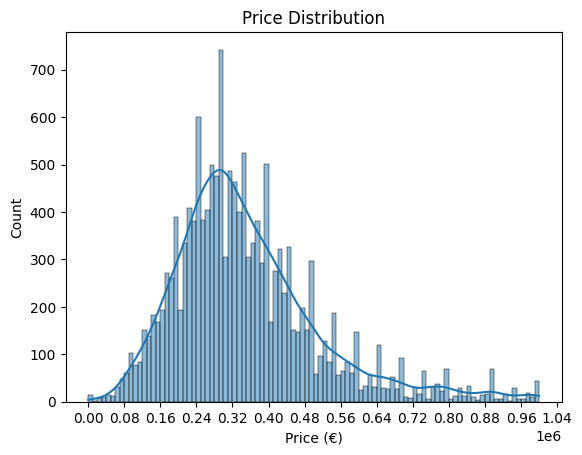

,property_ID,locality_name,postal_code,type,subtype,price (€),number_of_bedrooms,living_area (m²),"equiped_kitchen (yes:1, no:0)","furnished (yes:1, no:0)","open_fire (yes:1, no:0)","terrace (yes:1, no:0)",terrace_area (m²),"garden (yes:1, no:0)",number_facades,"swimming_pool (yes:1, no:0)",state_of_building
7,RBU66767,Kasteelloop 20,2300,Apartment,Apartment,999999,1,66,0,0,0,1,11,0,2,0,New
101,RWC41084,Kempenstraat 88,2000,Apartment,Penthouse,1950000,3,185,0,0,0,1,75,0,<NA>,0,Excellent
102,RBU58948,Kapelleveldstraat 53A,2530,Apartment,Apartment,765000,3,185,0,0,0,1,<NA>,1,<NA>,0,Excellent
186,RBU60634,Lange Leemstraat 374,2018,Apartment,Apartment,1099000,2,270,0,0,0,1,25,0,2,0,New
199,RBU60625,Lange Leemstraat 374,2018,Apartment,Apartment,799000,2,171,0,0,0,1,12,0,2,0,New


998


,property_ID,locality_name,postal_code,type,subtype,price (€),number_of_bedrooms,living_area (m²),"equiped_kitchen (yes:1, no:0)","furnished (yes:1, no:0)","open_fire (yes:1, no:0)","terrace (yes:1, no:0)",terrace_area (m²),"garden (yes:1, no:0)",number_facades,"swimming_pool (yes:1, no:0)",state_of_building
157,RBU62752,Minderhoutdorp 26C,2322,House,Residence,5000,5,190,0,0,0,1,<NA>,1,3,0,New
158,RBU62750,Minderhoutdorp 26,2322,House,Residence,5000,5,195,0,0,0,1,<NA>,1,3,0,New
284,RBU62749,<NA>,2322,House,Residence,5000,4,171,0,0,0,1,13,1,3,0,New
285,RBU62746,<NA>,2322,House,Residence,5000,4,174,0,0,0,1,13,1,3,0,New
4798,RBT47647,Stationsstraat 5,9340,Garage,Parking,21900,<NA>,<NA>,0,0,0,0,<NA>,0,<NA>,0,<NA>
4799,RBT47646,Stationsstraat 5,9340,Garage,Parking,8000,<NA>,<NA>,0,0,0,0,<NA>,0,<NA>,0,<NA>
7070,VBC61485,Rue de Lanaye,4600,House,Residence,16500,<NA>,<NA>,0,0,0,0,<NA>,0,4,0,<NA>
8445,RBK11179,<NA>,<NA>,Apartment,Apartment,1,3,124,1,0,0,1,<NA>,0,<NA>,0,New
8446,RBK11175,<NA>,<NA>,Apartment,Apartment,1,2,110,0,0,0,1,<NA>,0,2,0,New
8629,RBK11170,<NA>,<NA>,Apartment,Apartment,1,3,124,1,0,0,1,<NA>,0,2,0,New


16


In [ ]:
#PRICE  -> analysis : 16 properties (prices < 25K) could be dropped
# visual via boxplot 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

sns.boxplot(data=df, y="price (€)")
plt.show()

# Plot the distribution (KDE + histogram)
sns.histplot(df["price (€)"], kde=True, bins=100)
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(nbins=15))
#plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(500_000))
plt.xlabel("Price (€)")
plt.title('Price Distribution')
plt.ylabel('Count')
plt.show()

#plot the distribution without houses over 1M
df_cheaper = df[(df["price (€)"]) <= 1000000]
sns.histplot(df_cheaper["price (€)"], kde=True, bins=100)
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(nbins=15))
#plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(500_000))
plt.xlabel("Price (€)")
plt.title('Price Distribution')
plt.ylabel('Count')
plt.show()

#checking for outliers of price (quantitavely IQR and z-scores)
#IQR
Q1 = df["price (€)"].quantile(0.25)
Q3 = df["price (€)"].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

#1K houses are outside of the current IQR
outliers = df[(df["price (€)"] < lower) | (df["price (€)"] > upper)]
display(outliers.head())
print(len(outliers))

#DROP: houses under 25K are not realistic (probably mistakes), 16 such properties were found
df_very_small = df[(df["price (€)"]) < 25000]
display(df_very_small)
print(len(df_very_small))





In [57]:
#how many categories and how much?
display(df["number_of_bedrooms"].value_counts())
#show 50 bedroom house
df_fifty_bed = df[(df["number_of_bedrooms"]) == 50]
display(df_fifty_bed)
print("https://immovlan.be/nl/detail/kasteel/te-koop/3840/borgloon/rbu6280")
#show zero bedroom house:
df_zero_bed = df[(df["number_of_bedrooms"]) == 0]
display(df_zero_bed)

number_of_bedrooms
2     5338
3     4847
4     1878
1     1840
5      664
6      244
7       92
0       74
8       40
9       24
10      15
11       8
12       6
18       3
17       3
13       3
15       2
14       2
24       2
25       2
50       1
20       1
16       1
19       1
26       1
29       1
23       1
Name: count, dtype: Int64

,property_ID,locality_name,postal_code,type,subtype,price (€),number_of_bedrooms,living_area (m²),"equiped_kitchen (yes:1, no:0)","furnished (yes:1, no:0)","open_fire (yes:1, no:0)","terrace (yes:1, no:0)",terrace_area (m²),"garden (yes:1, no:0)",number_facades,"swimming_pool (yes:1, no:0)",state_of_building
8192,RBU62802,<NA>,<NA>,House,Mansion,1999000,50,1715,0,0,0,0,<NA>,1,<NA>,0,To be renovated


https://immovlan.be/nl/detail/kasteel/te-koop/3840/borgloon/rbu6280


,property_ID,locality_name,postal_code,type,subtype,price (€),number_of_bedrooms,living_area (m²),"equiped_kitchen (yes:1, no:0)","furnished (yes:1, no:0)","open_fire (yes:1, no:0)","terrace (yes:1, no:0)",terrace_area (m²),"garden (yes:1, no:0)",number_facades,"swimming_pool (yes:1, no:0)",state_of_building
395,RBU66858,Dorp 37,2275,House,Residence,285000,0,189,0,0,0,0,<NA>,0,<NA>,0,To be renovated
730,RBU61527,Helenalei 26 0206,2018,Apartment,Studio,109000,0,33,0,0,0,0,<NA>,0,<NA>,0,<NA>
1999,RBI53427,Pas 99 A 0.1,2440,Business,Commercial building,269750,0,<NA>,0,0,0,0,<NA>,0,<NA>,0,New
3656,RBU66888,Zeebergkaai 4,9300,Apartment,Studio,212000,0,53,1,0,0,1,8,0,2,0,New
4995,VBD46187,<NA>,7500,Apartment,Studio,160500,0,45,1,0,0,1,17,0,<NA>,1,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15872,VBD30482,Boulevard Auguste Reyers 32,1030,Apartment,Studio,175000,0,42,1,1,0,0,<NA>,0,2,0,Excellent
15882,VBD24876,Avenue de la Basilique 378,1081,Apartment,Studio,120000,0,27,1,0,0,0,<NA>,0,2,0,Normal
15909,VBB28763,Rue Philippe Le Bon 34,1000,Apartment,Studio,200000,0,32,1,0,0,1,<NA>,0,2,0,Normal
15987,VBD46309,Carsoel 39,1180,Apartment,Studio,178000,0,39,1,0,0,1,6,0,2,0,Normal


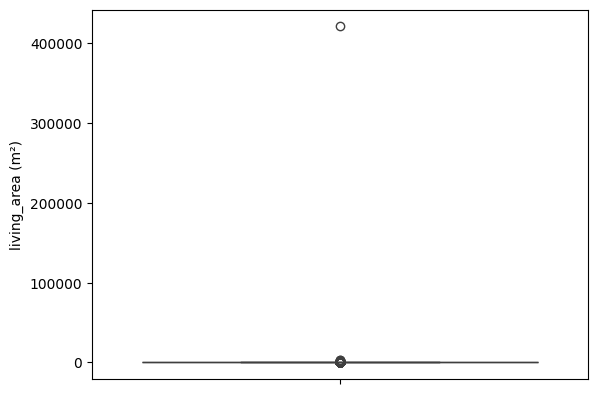

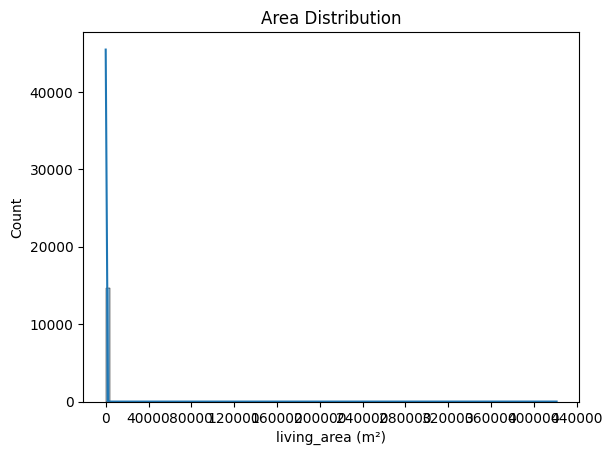

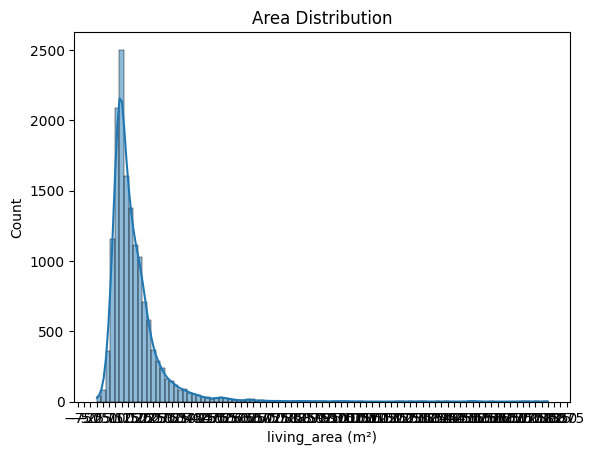

,property_ID,locality_name,postal_code,type,subtype,price (€),number_of_bedrooms,living_area (m²),"equiped_kitchen (yes:1, no:0)","furnished (yes:1, no:0)","open_fire (yes:1, no:0)","terrace (yes:1, no:0)",terrace_area (m²),"garden (yes:1, no:0)",number_facades,"swimming_pool (yes:1, no:0)",state_of_building
1,RBU61001,Nieuwstraat 13,2200,House,Residence,425000,3,378,0,0,0,1,<NA>,1,2,0,To be renovated
400,RBU66815,Poelstraatje 7,2200,House,Residence,545000,6,354,0,0,0,1,<NA>,1,4,0,To be renovated
406,RBU66871,Leopoldstraat 37,2570,House,Residence,295000,3,437,0,0,0,1,<NA>,1,<NA>,0,To be renovated
467,RBU65788,Leopoldstraat 1,2280,House,Villa,1076000,5,596,0,0,0,1,75,1,4,1,New
488,RBU65743,Mechelsesteenweg 6,2220,House,Mixed building,495000,5,340,0,0,0,0,<NA>,0,3,0,<NA>


806


,property_ID,locality_name,postal_code,type,subtype,price (€),number_of_bedrooms,living_area (m²),"equiped_kitchen (yes:1, no:0)","furnished (yes:1, no:0)","open_fire (yes:1, no:0)","terrace (yes:1, no:0)",terrace_area (m²),"garden (yes:1, no:0)",number_facades,"swimming_pool (yes:1, no:0)",state_of_building
3147,RWC40890,<NA>,1320,House,Villa,381050,3,1,1,0,0,0,<NA>,1,4,0,Excellent
3155,RWC40895,<NA>,1480,House,Villa,385050,3,1,1,0,0,0,<NA>,1,4,1,Excellent
3156,RWC40889,<NA>,1370,House,Villa,386050,3,1,1,0,0,0,<NA>,1,4,0,Excellent
3159,RWC40894,<NA>,1357,House,Villa,349350,3,1,1,0,0,0,<NA>,1,4,0,Excellent
3548,RWC40604,<NA>,1350,House,Villa,356050,3,1,1,0,0,0,<NA>,1,4,0,Excellent
3549,RWC40602,<NA>,1357,House,Villa,363050,3,1,1,0,0,0,<NA>,1,4,0,Excellent
3550,RWC40598,<NA>,1450,House,Villa,386050,3,1,1,0,0,0,<NA>,1,4,0,Excellent
3568,RWC40596,<NA>,1495,House,Villa,336050,3,1,1,0,0,0,<NA>,1,4,0,Excellent
3572,RWC40565,<NA>,1367,House,Villa,361050,3,1,1,0,0,0,<NA>,1,4,0,Excellent
3573,RWC40597,<NA>,1370,House,Villa,364050,3,1,1,0,0,0,<NA>,1,4,0,Excellent


24


,property_ID,locality_name,postal_code,type,subtype,price (€),number_of_bedrooms,living_area (m²),"equiped_kitchen (yes:1, no:0)","furnished (yes:1, no:0)","open_fire (yes:1, no:0)","terrace (yes:1, no:0)",terrace_area (m²),"garden (yes:1, no:0)",number_facades,"swimming_pool (yes:1, no:0)",state_of_building
7545,VBB76084,Chaussée de Tongres,4000,Apartment,Penthouse,421300,3,421300,0,0,0,1,8,0,2,0,New
6196,VBC54310,<NA>,6120,House,Residence,2500000,10,2670,1,0,1,1,<NA>,1,4,1,Normal
10621,VBD45568,<NA>,5660,House,Residence,990000,29,2350,0,0,0,0,<NA>,0,<NA>,0,<NA>
10938,VBD03417,Rue Grande 87,5550,House,Residence,319000,8,1800,0,0,0,1,<NA>,1,4,0,To restore
7829,VBD43878,rue du Pont 30,4180,House,Mixed building,750000,<NA>,1750,0,0,0,1,<NA>,0,3,0,To be renovated


In [ ]:
#Living area  -> analysis : 
# visual via boxplot 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

sns.boxplot(data=df, y="living_area (m²)")
plt.show()

# Plot the distribution (KDE + histogram)
sns.histplot(df["living_area (m²)"], kde=True, bins=100)
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(nbins=15))
#plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(500_000))
plt.xlabel("living_area (m²)")
plt.title('Area Distribution')
plt.ylabel('Count')
plt.show()

#replot the distribution without properties with areas over 2000m²
df_cheaper = df[(df["living_area (m²)"]) <= 2000]
sns.histplot(df_cheaper["living_area (m²)"], kde=True, bins=100)
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(nbins=15))
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(25))
plt.xlabel("living_area (m²)")
plt.title('Area Distribution')
plt.ylabel('Count')
plt.show()

#checking for outliers of living area (quantitavely IQR and z-scores)
#IQR
Q1 = df["living_area (m²)"].quantile(0.25)
Q3 = df["living_area (m²)"].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

#1K houses are outside of the current IQR
outliers = df[(df["living_area (m²)"] < lower) | (df["living_area (m²)"] > upper)]
display(outliers.head())
print(len(outliers))

#DROP: houses under 10m² are not realistic (probably mistakes), 24 such properties were found
df_very_small = df[(df["living_area (m²)"]) < 10]
display(df_very_small)
print(len(df_very_small))

#biggest living areas top 5 -> DROP the biggest one here
df_sorted = df.sort_values(by="living_area (m²)", ascending=False).head()
display(df_sorted)

In [65]:
#how many different values and how much are there?
df["equiped_kitchen (yes:1, no:0)"].value_counts()

equiped_kitchen (yes:1, no:0)
0    10777
1     4589
Name: count, dtype: int64

In [66]:
#how many different values and how much are there?
df["furnished (yes:1, no:0)"].value_counts()

furnished (yes:1, no:0)
0    15071
1      295
Name: count, dtype: int64

In [68]:
#how many different values and how much are there?
df["open_fire (yes:1, no:0)"].value_counts()

open_fire (yes:1, no:0)
0    15135
1      231
Name: count, dtype: int64

In [ ]:
#how many different values and how much are there?
df["terrace (yes:1, no:0)"].value_counts()



terrace (yes:1, no:0)
1    12319
0     3047
Name: count, dtype: int64

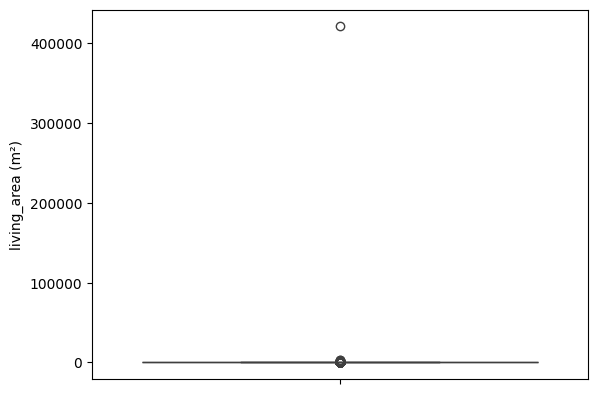

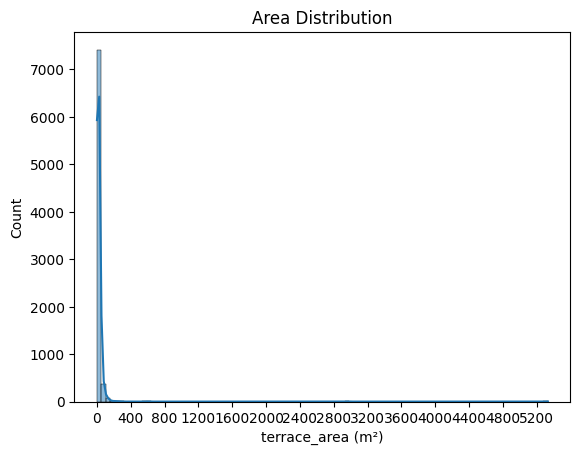

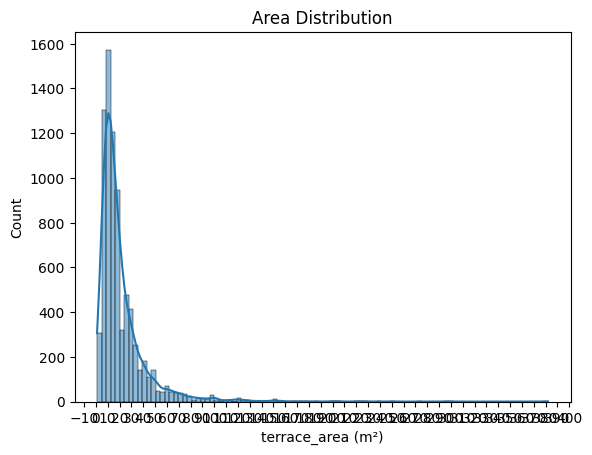

,property_ID,locality_name,postal_code,type,subtype,price (€),number_of_bedrooms,living_area (m²),"equiped_kitchen (yes:1, no:0)","furnished (yes:1, no:0)","open_fire (yes:1, no:0)","terrace (yes:1, no:0)",terrace_area (m²),"garden (yes:1, no:0)",number_facades,"swimming_pool (yes:1, no:0)",state_of_building
32,RBU66784,Kasteelloop 28,2300,Apartment,Apartment,399900,3,114,0,0,0,1,61,0,2,0,New
34,RBU66781,Kasteelloop 28,2300,Apartment,Apartment,405900,3,114,0,0,0,1,61,0,2,0,New
35,RBU66791,Kasteelloop 28,2300,Apartment,Apartment,407900,3,114,0,0,0,1,61,0,2,0,New
101,RWC41084,Kempenstraat 88,2000,Apartment,Penthouse,1950000,3,185,0,0,0,1,75,0,<NA>,0,Excellent
136,RBU57639,Neerstraat 61,2360,Apartment,Apartment,513190,3,152,0,0,0,1,54,0,2,0,New


655


,property_ID,locality_name,postal_code,type,subtype,price (€),number_of_bedrooms,living_area (m²),"equiped_kitchen (yes:1, no:0)","furnished (yes:1, no:0)","open_fire (yes:1, no:0)","terrace (yes:1, no:0)",terrace_area (m²),"garden (yes:1, no:0)",number_facades,"swimming_pool (yes:1, no:0)",state_of_building


0


,property_ID,locality_name,postal_code,type,subtype,price (€),number_of_bedrooms,living_area (m²),"equiped_kitchen (yes:1, no:0)","furnished (yes:1, no:0)","open_fire (yes:1, no:0)","terrace (yes:1, no:0)",terrace_area (m²),"garden (yes:1, no:0)",number_facades,"swimming_pool (yes:1, no:0)",state_of_building
2194,VBD36908,<NA>,1420,Apartment,Apartment,550000,3,134,1,0,0,1,382,1,3,0,New
2316,VBD49551,<NA>,1472,House,Villa,1295000,8,485,1,0,0,1,176,1,4,1,Normal
2341,RBU65815,<NA>,1380,House,Villa,895000,4,310,1,0,1,1,250,1,4,1,Normal
2481,VBD29402,Rue de l'abbaye 61,1357,House,Cottage,349000,3,387,0,0,0,1,228,1,4,0,Normal
3310,VBD28681,Boulevard de Wallonie,1348,Apartment,Apartment,795000,3,138,0,0,0,1,295,0,<NA>,0,New
3316,VBD28670,Boulevard de Wallonie,1348,Apartment,Apartment,675000,3,122,0,0,0,1,171,0,<NA>,0,New
3457,VBD26469,Rue Emile Dury 8,1410,House,Mixed building,490000,3,260,0,0,0,1,222,1,2,0,To be renovated
3505,VBD23636,Vivier Hanquet 28,1390,House,Residence,1750000,10,1485,0,0,0,1,1040,1,4,1,To renovate
4089,RBU64791,Boekhoutedorp 5,9961,House,Mansion,2498000,9,1699,1,0,0,1,275,1,4,0,Excellent
5047,VBB07463,Rue de la Clef A.0.10,6220,Apartment,Apartment,228000,2,81,0,0,0,1,201,1,<NA>,0,New


39


,property_ID,locality_name,postal_code,type,subtype,price (€),number_of_bedrooms,living_area (m²),"equiped_kitchen (yes:1, no:0)","furnished (yes:1, no:0)","open_fire (yes:1, no:0)","terrace (yes:1, no:0)",terrace_area (m²),"garden (yes:1, no:0)",number_facades,"swimming_pool (yes:1, no:0)",state_of_building
9351,VBD48225,Lenclos 38A,6740,Apartment,Apartment,338847,2,86,0,0,0,1,5331,1,2,0,<NA>
9674,VBD02356,Lenclos 38A,6740,Apartment,Apartment,338847,2,86,0,0,0,1,5331,1,2,0,New
9519,VBD27800,Route de Bastogne,6950,House,Residence,349000,4,130,0,0,0,1,2968,1,4,0,New
9398,VBD46611,Route de Bastogne,6900,House,Residence,349000,4,130,0,0,0,1,2968,1,4,0,<NA>
9520,VBD27799,Route de Bastogne 34,6950,House,Residence,369000,4,130,0,0,0,1,2519,1,4,0,New


In [ ]:
#Living area  -> analysis : 
# visual via boxplot 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

sns.boxplot(data=df, y="living_area (m²)")
plt.show()

# Plot the distribution (KDE + histogram)
sns.histplot(df["terrace_area (m²)"], kde=True, bins=100)
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(nbins=15))
#plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(500_000))
plt.xlabel("terrace_area (m²)")
plt.title('Area Distribution')
plt.ylabel('Count')
plt.show()

#replot the distribution without properties with areas over 500m²
df_cheaper = df[(df["terrace_area (m²)"]) <= 500]
sns.histplot(df_cheaper["terrace_area (m²)"], kde=True, bins=100)
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(nbins=15))
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(10))
plt.xlabel("terrace_area (m²)")
plt.title('Area Distribution')
plt.ylabel('Count')
plt.show()

#checking for outliers of living area (quantitavely IQR and z-scores)
#IQR
Q1 = df["terrace_area (m²)"].quantile(0.25)
Q3 = df["terrace_area (m²)"].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

#1K houses are outside of the current IQR
outliers = df[(df["terrace_area (m²)"] < lower) | (df["terrace_area (m²)"] > upper)]
display(outliers.head())
print(len(outliers))

#DROP: terraces of 0 m² are not realistic (probably mistakes), not one is found!
df_very_small = df[(df["terrace_area (m²)"]) < 1 ]
display(df_very_small)
print(len(df_very_small))

#DROP: terraces of 150 m² or more are not realistic (probably mistakes), not one is found!
df_very_big = df[(df["terrace_area (m²)"]) > 150 ]
display(df_very_big)
print(len(df_very_big))

#biggest terrace areas top 5 -> DROP the biggest one here
df_sorted = df.sort_values(by="terrace_area (m²)", ascending=False).head()
display(df_sorted)

In [74]:
#how many different values and how much are there?
df["garden (yes:1, no:0)"].value_counts()

garden (yes:1, no:0)
1    8301
0    7065
Name: count, dtype: int64

In [75]:
#how many different values and how much are there?
df["number_facades"].value_counts()

number_facades
2    4576
4    3281
3    2989
1       7
Name: count, dtype: Int64

In [76]:
#how many different values and how much are there?
df["swimming_pool (yes:1, no:0)"].value_counts()

swimming_pool (yes:1, no:0)
0    14983
1      383
Name: count, dtype: int64

In [79]:
#how many different values and how much are there?
display(df["state_of_building"].value_counts())
demolish = df[(df["state_of_building"] == "To demolish")] 
display(demolish)

state_of_building
New                   5960
Normal                2772
Excellent             1384
To be renovated       1294
To renovate            412
Fully renovated        286
Under construction      15
To restore              11
To demolish              7
Name: count, dtype: Int64

,property_ID,locality_name,postal_code,type,subtype,price (€),number_of_bedrooms,living_area (m²),"equiped_kitchen (yes:1, no:0)","furnished (yes:1, no:0)","open_fire (yes:1, no:0)","terrace (yes:1, no:0)",terrace_area (m²),"garden (yes:1, no:0)",number_facades,"swimming_pool (yes:1, no:0)",state_of_building
2423,VBD46531,<NA>,1420,House,Residence,895000,8,<NA>,0,0,0,0,<NA>,0,3,0,To demolish
2456,VBD44619,<NA>,1310,House,Residence,395000,5,295,0,0,0,1,<NA>,1,2,0,To demolish
3896,RBU66954,Rotelenberg 10,9700,House,Residence,565000,2,200,0,0,0,1,<NA>,1,4,0,To demolish
4180,RBU62517,Oordegemsesteenweg 324,9230,House,Residence,169000,2,114,0,0,0,1,<NA>,1,3,0,To demolish
6832,VBD45514,Route du Condroz 141,4120,House,Residence,450000,4,<NA>,0,0,0,0,<NA>,1,4,0,To demolish
12329,RBU66848,Waaienberg 5,3080,House,Residence,339000,3,153,0,0,0,0,<NA>,1,<NA>,0,To demolish
13871,RBU66379,Posterijlaan 45,8740,House,Residence,259000,3,148,0,0,0,0,<NA>,0,<NA>,0,To demolish
